## Pandas

#### Cielo Aholiva Higuera Gutiérrez

### Creating DataFrames

In [514]:
import pandas as pd

In [219]:
df = pd.DataFrame({"a" : [4, 5, 6], 
                   "b" : [7, 8, 9], 
                   "c" : [10, 11, 12]}, 
                  index = [1, 2, 3]) #Specify values for each column
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [62]:
df = pd.DataFrame ([[4, 7, 10], [5, 8, 11], [6, 9, 12]], index = [1, 2, 3], columns = ['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [50]:
df = pd.DataFrame({"a" : [4, 5, 6], "b" : [7, 8, 9], "c" : [10, 11, 12]}, index = pd.MultiIndex.from_tuples([('d', 1), ('d',2), ('e', 2)], names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

### Method Chaining

In [150]:
d_f = (pd.melt(df).rename(columns={'variable':'var', 'value':'val'}).query('val >= 200'))
d_f

,var,val


#### Reshaping Data

In [72]:
pd.melt(d_f) #Gather columns into rows

,variable,value


In [74]:
d_f.pivot(columns='var', values='val') # Spread rows into columns

var


In [82]:
df1 = pd.DataFrame({"a" : [1, 2, 3], "b" : [7, 8, 9], "c" : [10, 11, 12]}, index = [1, 2, 3]) #Specify values for each column
df1

,a,b,c
1,1,7,10
2,2,8,11
3,3,9,12


In [86]:
df2 = pd.DataFrame({"a" : [6, 7, 10], "b" : [6, 2, 1], "c" : [9, 11, 12]}, index = [1, 2, 3]) #Specify values for each column
df2

,a,b,c
1,6,6,9
2,7,2,11
3,10,1,12


In [88]:
pd.concat([df1,df2]) #Append rows of DataFrames

,a,b,c
1,1,7,10
2,2,8,11
3,3,9,12
1,6,6,9
2,7,2,11
3,10,1,12


In [90]:
pd.concat([df1,df2], axis=1) # Append columns of DataFrames

,a,b,c,a,b,c
1,1,7,10,6,6,9
2,2,8,11,7,2,11
3,3,9,12,10,1,12


In [179]:
df.sort_values(by=['a'])

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [191]:
df.sort_values(by=['a'], ascending=False) #Order rowa by values of a column (high to low).

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [193]:
df.sort_index() #Sort the index of a DataFrame

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [203]:
df.reset_index() #Rreset index of DataFrame to row numbers, moving index to columns

,index,a,b,c
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [240]:
df.sample(frac=0.5)

,a,b,c
3,6,9,12
2,5,8,11


#### Subset Observations - rows

In [290]:
df.drop_duplicates() #Remove duplicate rows (only considers columns)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [230]:
df.sample(frac=0.5)

,a,b,c
1,4,7,10
3,6,9,12


In [264]:
df.sample(n=10, replace=True) #Randomly select n rows

,a,b,c
3,6,9,12
3,6,9,12
3,6,9,12
3,6,9,12
2,5,8,11
3,6,9,12
3,6,9,12
1,4,7,10
3,6,9,12
1,4,7,10


In [276]:
df.nlargest(10, 'b') #Select and order top n entries

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [280]:
df.nsmallest(10, 'c') #Select and order bottom n entries

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [282]:
df.head(1)

,a,b,c
1,4,7,10


In [284]:
df.tail(3)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


#### Subset Variables -Columns

In [320]:
df5 = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
df5

,length,width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,7.0,3.2,1
3,6.4,3.2,1
4,5.9,3.0,2


In [326]:
df5['width'] #Select single column with specific name

0    3.5
1    3.0
2    3.2
3    3.2
4    3.0
Name: width, dtype: float64

In [330]:
df.filter(regex = 'regex') #Select columns whose name matches regular expression regex

""
1
2
3


#### Subsets - rows and columns

In [361]:
df.loc[1] #To select only rows, only columns or both

a     4
b     7
c    10
Name: 1, dtype: int64

In [385]:
df.iloc[10:20] #Select row 10-20

,a,b,c


In [379]:
df.iloc[:, 0] #Selec columns in positions 1, 2  and 5

1    4
2    5
3    6
Name: a, dtype: int64

In [391]:
df.loc[:, 'x2':'x4']

""
1
2
3


In [405]:
df.iat[1, 2] #Access single value by index

11

In [411]:
df.at[2, 'a'] #Access single value by label

5

#### Summarize Data

In [420]:
df['a'].value_counts() #Count number of rows with each unique value of variable

a
4    1
5    1
6    1
Name: count, dtype: int64

In [422]:
len(df) # of rows in DataFrame

3

In [426]:
df.shape #Tuple of # of rows, # of columns in DataFrame.

(3, 3)

In [430]:
df['a'].nunique()  # of distinct values in a column.

3

In [454]:
df.describe() #Basic descriptive and statistics for each column (or GroupBy).

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


In [460]:
max(df)

'c'

In [462]:
min(df)

'a'

#### Handling Missing

In [439]:
df.dropna() #Drop rows with any column having NA/null data

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [441]:
df.fillna(1) #Replace all NA/null data with value

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


#### Make new columns

In [466]:
df.assign(Area=lambda df: df.a^2) #Compute and append one or more new columns

,a,b,c,Area
1,4,7,10,6
2,5,8,11,7
3,6,9,12,4


In [472]:
df['Volume'] = df.a*df.b
df

,a,b,c,Volume
1,4,7,10,28
2,5,8,11,40
3,6,9,12,54


In [476]:
pd.qcut(df.a, 1, labels=False) #Bin column into n buckets

1    0
2    0
3    0
Name: a, dtype: int64

#### Combine Data Sets

In [546]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], 
                    "x2": [1, 2, 3]})

print(adf)

  x1  x2
0  A   1
1  B   2
2  C   3


In [544]:
bdf = pd.DataFrame({"x1": ["A", "B", "D"], 
                    "x3": ["T", "F", "T"]})

print(bdf)

  x1 x3
0  A  T
1  B  F
2  D  T


In [548]:
pd.merge(adf, bdf, how='left', on='x1') #Join matching rows from bdf to adf.

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [550]:
pd.merge(adf, bdf, how='right', on='x1') # Join matching rows from adf to bdf.

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [552]:
pd.merge(adf, bdf, how='inner', on='x1') # Join data. Retain only rows in both sets

,x1,x2,x3
0,A,1,T
1,B,2,F


In [554]:
pd.merge(adf, bdf, how='outer', on='x1') #Join data. Retain all values, all rows.

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [558]:
adf[adf.x1.isin(bdf.x1)] #All rows in adf that have a match in bdf

,x1,x2
0,A,1
1,B,2


In [561]:
adf[~adf.x1.isin(bdf.x1)] #All rows in adf that do not have a match in bdf

,x1,x2
2,C,3


In [563]:
ydf = pd.DataFrame({"x1": ["A", "B", "C"], 
                    "x2": [1, 2, 3]})

print(ydf)

  x1  x2
0  A   1
1  B   2
2  C   3


In [566]:
zdf = pd.DataFrame({"x1": ["B", "C", "D"], 
                    "x2": [2, 3, 4]})

print(zdf)

  x1  x2
0  B   2
1  C   3
2  D   4


In [573]:
pd.merge(ydf, zdf) # Rows that appear in both ydf and zdf (Intersection).

,x1,x2
0,B,2
1,C,3


In [575]:
pd.merge(ydf, zdf, how='outer') # Rows that appear in either or both ydf and zdf (Union).


,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [581]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
#Rows that appear in ydf but not zdf (Setdiff)

,x1,x2
0,A,1


#### Group Data

In [586]:
df.groupby(by="a") #Return a GroupBy object, grouped by values in column named "col"

### Windows

In [614]:
df.expanding()

Expanding [min_periods=1,axis=0,method=single]

In [618]:
df.rolling(1)

Rolling [window=1,center=False,axis=0,method=single]

### Plotting

<Axes: ylabel='Frequency'>

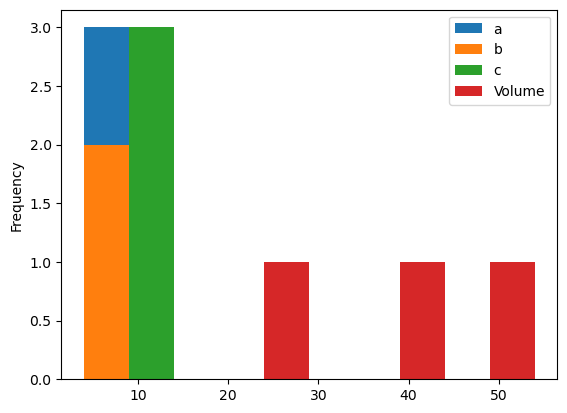

In [625]:
df.plot.hist()

<Axes: xlabel='a', ylabel='b'>

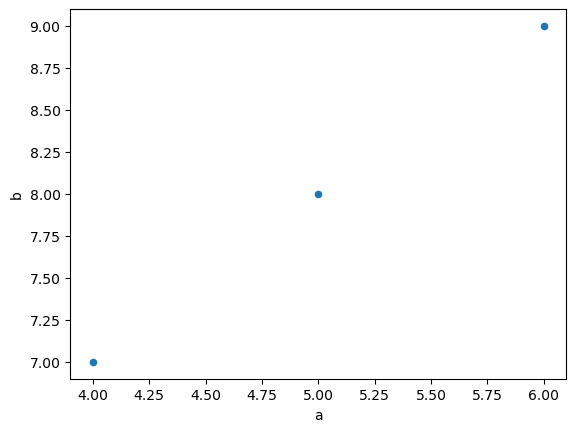

In [629]:
df.plot.scatter(x='a',y='b')